<a href="https://colab.research.google.com/github/akhiilkasare/car-brand-prediction/blob/master/Copy_of_Car_brand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Resizing all the immages 

IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/image_dataset/Train'
valid_path = '/content/drive/My Drive/image_dataset/Test'

* Importing the resnet library
* In the input_shape argument the + [3] indictes basically 3 channels ie RGB
* The weights we will be using will be default weights i.e. imagenet weights
* include_top=False we have passed because in resnet the output categories are basically 1000 categories but in our case we need only three categories so because of that we dont habe to use the 1st and the last if you had 1000 categories you would have written `True` here and in the top most layer we need to provide my own layer, own dataset because of that we are going to pass include=False

In [ ]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


* We dont have to train the existing weights we just have to train our last layer
* layer.trainable = False means i dont want to train my images

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

* Glob is useful for getting the number of output classes

In [ ]:
folders = glob('/content/drive/My Drive/image_dataset/Train/*')

In [ ]:
folders

['/content/drive/My Drive/image_dataset/Train/lamborghini',
 '/content/drive/My Drive/image_dataset/Train/mercedes',
 '/content/drive/My Drive/image_dataset/Train/audi']

In [ ]:
len(folders)

3

* We need to Flatten our resnet model

![alt text](https://www.jeremyjordan.me/content/images/2018/04/vgg16.png)

## What is Flattning ? 
- we can see from the from the above vgg16 architecture is after 7 x 7 x 512 we need to convert our 2D features into 1D features. Flattening is required when it is required to convert a fully connected layer 

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
# Our output will be our predition with 3 nodes

prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet.inputs, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

* We have got the 3 nodes as my output this basically means that the number of outputs present with respect to our problem statement is 3 

In [ ]:
# Compiling our model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Now we need to read all the images from the folders.
* When we'll be reading our images from our folder we should make sure that we also need to do some data augmentation.
* Now the data augmentation can be done by `ImageDataGenerator`.
* The `ImageDataGenerator` what does it reads the images from the folders and then it applies some kind of augmentation like zooming, scaling, horizontal/vertical flipping
* **IN THE TEST DATA WE SHOULD NEVER DO DATA AUGMENTATION WE JUST HAVE TO PERFORM SCALING**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scaling all the images between 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)

# WE SHOULD NOT PERFORM DATA AUGMENTATION ON THE TEST DATASET
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow_from_directory means i am applying all the train_datagen techniques to all the images
# We need to provide the same traget_size as initialized in the IMAGE_SIZE
# If you have more than two classes we should use class_mode = categorical
# But if we have just two classses we can use class_mode = binary

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/image_dataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
# Applying same technique to the test set
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/image_dataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# Fitting our model

r = model.fit_generator(training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - 58s 29s/step - loss: 4.8893 - accuracy: 0.3594 - val_loss: 9.5430 - val_accuracy: 0.5172
Epoch 2/100
2/2 [==============================] - 1s 572ms/step - loss: 10.4864 - accuracy: 0.3125 - val_loss: 5.5423 - val_accuracy: 0.1552
Epoch 3/100
2/2 [==============================] - 1s 547ms/step - loss: 4.3185 - accuracy: 0.2500 - val_loss: 4.6158 - val_accuracy: 0.3276
Epoch 4/100
2/2 [==============================] - 1s 558ms/step - loss: 5.2252 - accuracy: 0.3906 - val_loss: 5.4389 - val_accuracy: 0.3276
Epoch 5/100
2/2 [==============================] - 1s 553ms/step - loss: 3.7588 - accuracy: 0.3906 - val_loss: 1.5495 - val_accuracy: 0.5517
Epoch 6/100
2/2 [==============================] - 1s 549ms/step - loss: 2.1858 - accuracy: 0.4062 - val_loss: 3.9662 - val_accuracy: 0.2759
Epoch 7/100
2/2 [==============================] - 1s 554ms/step - loss: 3.543

In [ ]:
# If your accuracy=100% and your validation accuracy < 50% that means your model is overfitting, validation loss if for the test data


## Plotting the loss

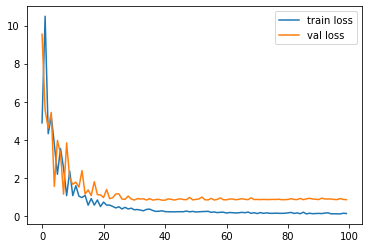

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

## Plotting the accuracy

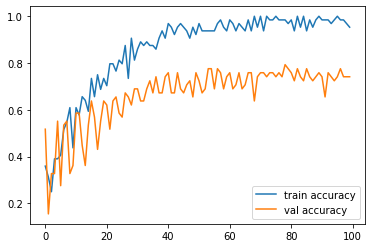

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accval_acc')

In [ ]:
# Saving the model
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
# Predicting the model

pred = model.predict(test_set)
pred

array([[3.53807151e-01, 6.25290811e-01, 2.09020451e-02],
       [5.37467778e-01, 4.21368517e-02, 4.20395374e-01],
       [6.11925460e-02, 5.25946200e-01, 4.12861228e-01],
       [5.26344916e-03, 3.55764151e-01, 6.38972402e-01],
       [2.50220560e-02, 8.65445375e-01, 1.09532617e-01],
       [2.61870306e-02, 3.99502218e-01, 5.74310780e-01],
       [7.21800840e-03, 9.92379308e-01, 4.02668986e-04],
       [1.15797222e-02, 8.01307321e-01, 1.87113032e-01],
       [8.32114078e-04, 9.95997667e-01, 3.17021133e-03],
       [2.15551313e-02, 4.75570351e-01, 5.02874494e-01],
       [3.43901254e-02, 8.60255599e-01, 1.05354339e-01],
       [1.79995783e-02, 1.39628816e-03, 9.80604053e-01],
       [1.06394216e-01, 5.28895795e-01, 3.64710003e-01],
       [4.18572277e-02, 7.29736745e-01, 2.28405997e-01],
       [3.95174697e-03, 9.90514755e-01, 5.53346612e-03],
       [2.07560256e-01, 6.33751273e-01, 1.58688456e-01],
       [3.38501148e-02, 2.26475596e-01, 7.39674330e-01],
       [1.56654835e-01, 7.08055

In [ ]:
import numpy as np

pred = np.argmax(pred, axis=1)

In [ ]:
pred

array([1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('model_resnet50.h5')

In [ ]:
img = image.load_img('/content/drive/My Drive/image_dataset/Test/lamborghini/15.jpg', target_size=(224,224))

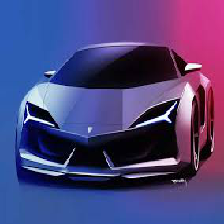

In [ ]:
img

In [ ]:
# Converting the image into an array

x = image.img_to_array(img)
x

array([[[ 45.,  92., 182.],
        [ 45.,  92., 182.],
        [ 45.,  92., 182.],
        ...,
        [216.,  59., 148.],
        [216.,  59., 148.],
        [216.,  59., 148.]],

       [[ 45.,  92., 182.],
        [ 45.,  92., 182.],
        [ 45.,  92., 182.],
        ...,
        [216.,  59., 148.],
        [216.,  59., 148.],
        [216.,  59., 148.]],

       [[ 45.,  92., 182.],
        [ 45.,  92., 182.],
        [ 45.,  92., 182.],
        ...,
        [216.,  59., 148.],
        [216.,  59., 148.],
        [216.,  59., 148.]],

       ...,

       [[ 52.,  90., 165.],
        [ 52.,  90., 165.],
        [ 52.,  90., 165.],
        ...,
        [ 53.,  85., 158.],
        [ 53.,  85., 158.],
        [ 53.,  85., 158.]],

       [[ 52.,  90., 165.],
        [ 52.,  90., 165.],
        [ 52.,  90., 165.],
        ...,
        [ 53.,  85., 158.],
        [ 53.,  85., 158.],
        [ 53.,  85., 158.]],

       [[ 51.,  88., 168.],
        [ 51.,  88., 166.],
        [ 51.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255